In [36]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.api import ExponentialSmoothing
import warnings
warnings.filterwarnings("ignore")


df = pd.read_csv("planilhas/dfRegressaoDias.csv", sep=';', parse_dates=['Data'], index_col="Data")
display(df)
df.info()

split = int(0.7 * len(df))


X_treino = df[:split].index
X_teste = df[split:].index

Y_treino = df[:split].values
Y_teste = df[split:].values

,CasosDia
Data,
2020-03-15,3
2020-03-16,3
2020-03-17,3
2020-03-18,1
2020-03-19,0
...,...
2023-09-24,0
2023-09-25,13
2023-09-26,14


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1293 entries, 2020-03-15 to 2023-09-28
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   CasosDia  1293 non-null   int64
dtypes: int64(1)
memory usage: 20.2 KB


# Média Móvel

905
388
905
388


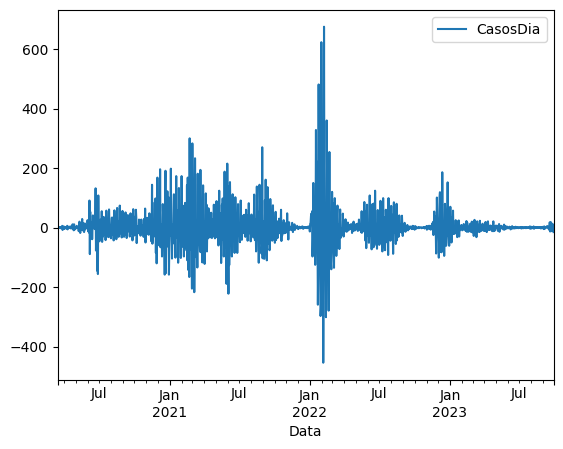

In [37]:
df.diff().plot() 
print(len(X_treino))
print(len(X_teste))
print(len(Y_treino))
print(len(Y_teste))



In [38]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
 
# FUNÇAO RETIRADA DO LIVRO Introduction to Machine Learning with Python
def rolling_forecast(df: pd.DataFrame, train_len: int, horizon: int, window: int, method: str) -> list:                               
    
  total_len = train_len + horizon
  
  if method == 'mean':
      pred_mean = []
      
      for i in range(train_len, total_len, window):
          mean = np.mean(df[:i].values)
          pred_mean.extend(mean for _ in range(window))

      return pred_mean

  elif method == 'last':
      pred_last_value = []
      
      for i in range(train_len, total_len, window):
          last_value = df[:i].iloc[-1].values[0]
          pred_last_value.extend(last_value for _ in range(window))
      return pred_last_value
  
  elif method == 'MA':  # MA de ordem Q
      pred_MA = []
      
      for i in range(train_len, total_len, window):
          model = SARIMAX(df[:i], order=(0,0,2))                  
          res = model.fit(disp=False)
          predictions = res.get_prediction(0, i + window - 1)
          oos_pred = predictions.predicted_mean.iloc[-window:]    
          pred_MA.extend(oos_pred)
          
      return pred_MA
  

janela = [1, 2, 4,6,8]
all_preds = []



In [39]:
janela = [1, 2, 3, 4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
all_preds = []

# MEDIA MOVEL DE ORDEM Q - MEDIA MOVEL
for j in janela:
    pred = rolling_forecast(df, len(Y_treino), len(Y_teste), j, 'MA')
    all_preds.append(pred)

print(len(Y_treino))
print(len(X_teste))
print([len(pred) for pred in all_preds])

# DA VALORES DE PREDIÇAO DIFERENTES DO TAMANHO DO TESTE (APENAS JANELAS 1 2 e 4 da certo)


905
388
[388, 388, 390, 388, 390, 390, 392, 392, 396, 390, 396, 396, 390, 392, 390, 400, 391, 396, 399, 400]


388
[19.77311943212802, 5.319837631772989, -1.744551122997497, 0.32493165767332394, 6.067183301636445, 0.44979532613010387, 1.7528141510883315, 2.8710806122122485, 7.184798526987061, 1.6544807084320503, 5.830524018071898, 4.615382790934504, -0.5631749895879166, 1.4090329091845049, 2.4013633903911145, 1.2240738687124255, 1.8501747909202588, -0.5603589982076431, 5.61580607880775, 3.2839918806600528, -0.9034607324786039, 1.4902760662251366, -1.4715726790024437, -3.3667286600661517, 6.884280402110423, 3.5607495040500474, -3.6886807749812895, -2.2342919026943258, 5.780968763774439, 2.10461158216793, 2.5657915747759006, 2.8900218834572633, -1.83256301364122, -0.16303186939804806, -0.633604923832237, -1.0381713751974597, 2.390967769198511, 0.8314629360129926, 1.2162108881574745, 1.58606576793047, -0.5044263377579649, -0.22177762728089329, 2.1983169922073076, 0.4025747001227018, 0.26037995821866733, -0.1346413613022661, -0.1853887856220054, -0.3772055145666788, 0.30446395904350765, 0.114047684

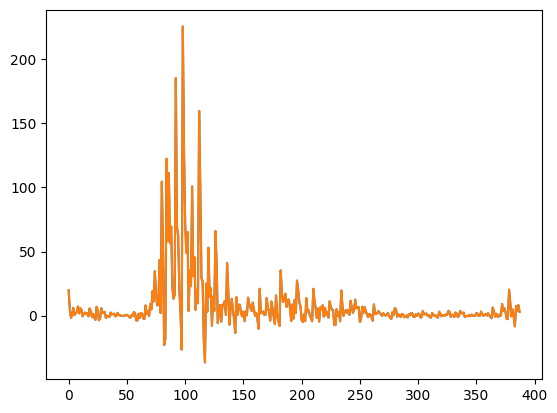

In [40]:
janela = 2

pred = rolling_forecast(df, len(Y_treino), len(Y_teste), janela, 'MA')
all_preds.append(pred)
print(len(pred))
plt.plot(pred)

#serieMM = pd.Series(pred, index=X_teste)
plt.plot(pred)

print(pred)


## NUMEROS NEGATIVOS

Previsões:
388


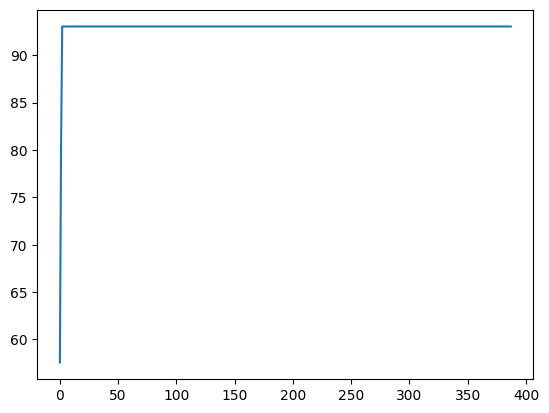

In [41]:
#USANDO ARIMA APENAS ORDEM Q

import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Função para fazer a previsão usando a média móvel de ordem Q
def ma_prediction(train_data, test_data, order_q):
    # Ajuste o modelo SARIMA aos dados de treinamento
    model = ARIMA(train_data, order=(0, 0, order_q))
    model_fit = model.fit()
    
    # Faça previsões nos dados de teste
    predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)
    
    return predictions


# Defina a ordem Q para a média móvel
order_q = 2

# Faça a previsão usando a média móvel de ordem Q
predictions = ma_prediction(Y_treino, Y_teste, order_q)

print("Previsões:")
print(len(predictions))


plt.plot(predictions)

!! ULTIMO VALOR (20) É A MÉDIA !!!


,PARA,MAE,MSE,RMSE
0,7,23.02,1555.63,39.44
1,7,23.02,1555.63,39.44
2,7,23.02,1555.63,39.44
3,7,23.02,1555.63,39.44
4,7,23.02,1555.63,39.44
5,7,23.02,1555.63,39.44
6,7,23.02,1555.63,39.44
7,7,23.02,1555.63,39.44
8,7,23.02,1555.63,39.44
9,7,23.02,1555.63,39.44


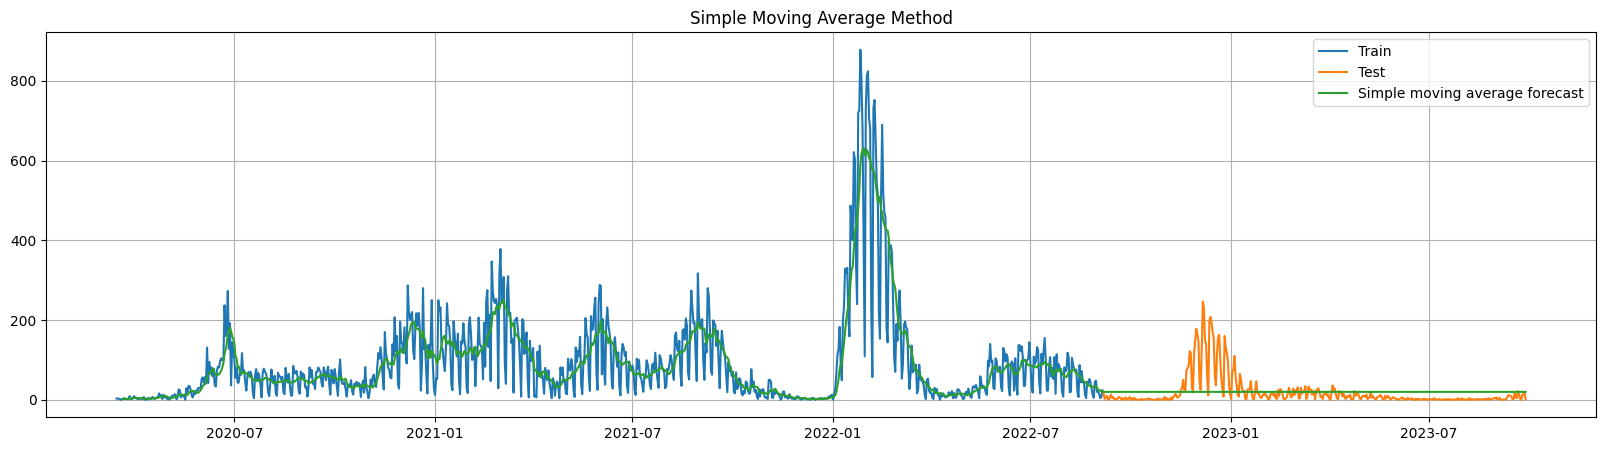

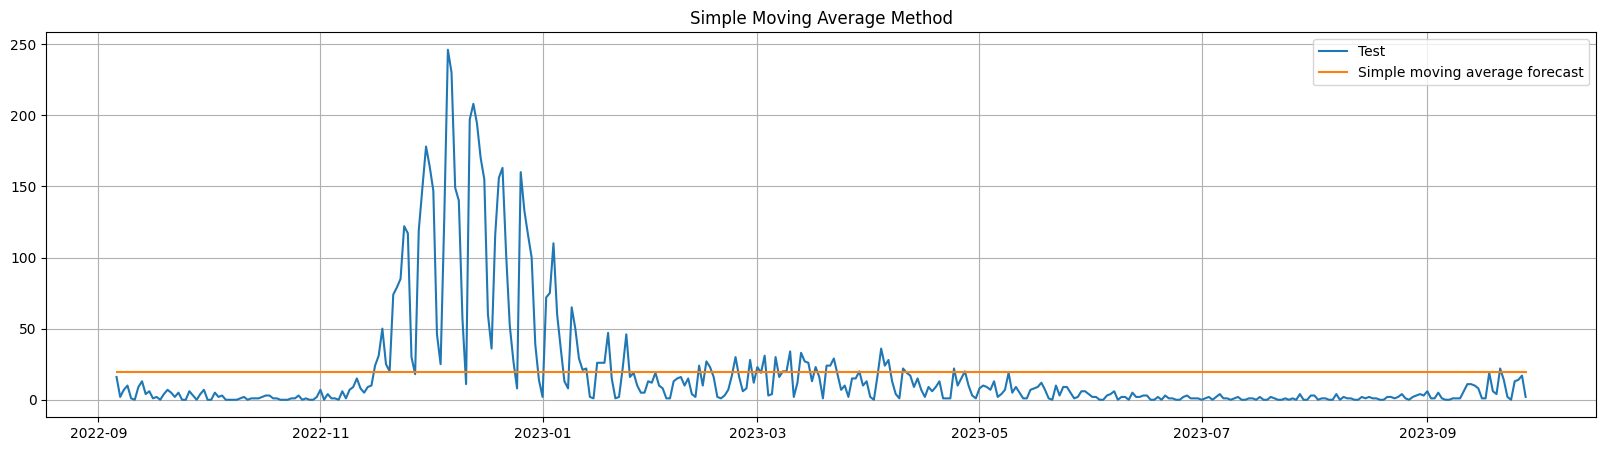

In [42]:
janela = range(1, 20)

train = df[:split]
test = df[split:]

mseMM = []
rmseMM = []
maeMM = []
parametrosMM = []
auxMae = 0


for j in range(20):

    maeCalibra = 0
    auxMae = 0
    ## CALIBRAR
    for i in janela:
        media_movel = df['CasosDia'].rolling(i).mean()
        media_movel[split:] = media_movel[split-1]

        maeCalibra = mean_squared_error(test['CasosDia'], media_movel[split:]).round(2)

        if (maeCalibra < auxMae or auxMae == 0):
            auxMae = maeCalibra
            para_MM = i



    ## TREINA
    media_movel = df['CasosDia'].rolling(para_MM).mean()
    media_movel[split:] = media_movel[split-1]

    mae = mean_absolute_error(test['CasosDia'], media_movel[split:]).round(2)
    mse = mean_squared_error(test['CasosDia'], media_movel[split:]).round(2)
    rmse = np.sqrt(mse).round(2)

    mseMM.append(mse)
    rmseMM.append(rmse)
    maeMM.append(mae)
    parametrosMM.append(para_MM)


# RESULTADOSSSS !!!!
    
parametroMaisEscolhidoMM = max(set(parametrosMM), key=parametrosMM.count)
media_maeMM = np.mean(maeMM)
media_mseMM = np.mean(mseMM)
media_rmseMM = np.mean(rmseMM)

parametrosMM.append(parametroMaisEscolhidoMM)
maeMM.append(media_maeMM)
mseMM.append(media_mseMM)
rmseMM.append(media_rmseMM)


dfMediaMovel = pd.DataFrame({
    'PARA': parametrosMM,
    'MAE': maeMM,
    'MSE': mseMM,
    'RMSE': rmseMM
})


print("!! ULTIMO VALOR (20) É A MÉDIA !!!")
display(dfMediaMovel)

dfMediaMovel.to_csv('resultadosModelos/dfMediaMovel.csv', sep = ';', index = False, encoding='UTF-8')



plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train['CasosDia'], label='Train')
plt.plot(test['CasosDia'], label='Test')
plt.plot(media_movel, label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

plt.figure(figsize=(20,5))
plt.grid()
plt.plot(test['CasosDia'], label='Test')
plt.plot(media_movel[split:], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

!! ULTIMO VALOR (20) É A MÉDIA !!!


,PARA,MAE,MSE,RMSE
0,19,12.21,668.2,25.85
1,19,12.21,668.2,25.85
2,19,12.21,668.2,25.85
3,19,12.21,668.2,25.85
4,19,12.21,668.2,25.85
5,19,12.21,668.2,25.85
6,19,12.21,668.2,25.85
7,19,12.21,668.2,25.85
8,19,12.21,668.2,25.85
9,19,12.21,668.2,25.85


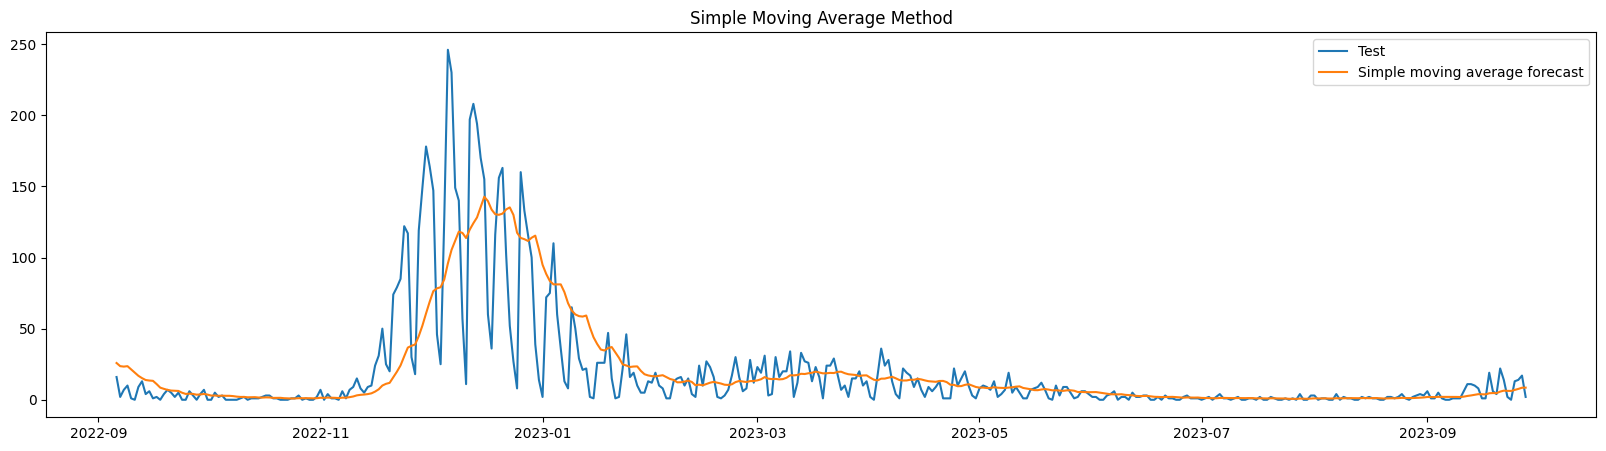

In [43]:
janela = range(1, 20)

train = df[:split]
test = df[split:]

mseMM = []
rmseMM = []
maeMM = []
parametrosMM = []

bestMae = float('inf')


for j in range(20):

    maeCalibra = 0
    auxMae = 0
    ## CALIBRAR
    for i in janela:
        media_movel = df['CasosDia'].rolling(20).mean()

        maeCalibra = mean_squared_error(df[split:], media_movel[split:]).round(2)

        if (maeCalibra < bestMae):
            auxMae = maeCalibra
            para_MM = i



    ## TREINA
    media_movel = df['CasosDia'].rolling(para_MM).mean()

    mae = mean_absolute_error(test['CasosDia'], media_movel[split:]).round(2)
    mse = mean_squared_error(test['CasosDia'], media_movel[split:]).round(2)
    rmse = np.sqrt(mse).round(2)

    mseMM.append(mse)
    rmseMM.append(rmse)
    maeMM.append(mae)
    parametrosMM.append(para_MM)


# RESULTADOSSSS !!!!
    
parametroMaisEscolhidoMM = max(set(parametrosMM), key=parametrosMM.count)
media_maeMM = np.mean(maeMM)
media_mseMM = np.mean(mseMM)
media_rmseMM = np.mean(rmseMM)

parametrosMM.append(parametroMaisEscolhidoMM)
maeMM.append(media_maeMM)
mseMM.append(media_mseMM)
rmseMM.append(media_rmseMM)


dfMediaMovel = pd.DataFrame({
    'PARA': parametrosMM,
    'MAE': maeMM,
    'MSE': mseMM,
    'RMSE': rmseMM
})


print("!! ULTIMO VALOR (20) É A MÉDIA !!!")
display(dfMediaMovel)

dfMediaMovel.to_csv('resultadosModelos/dfMediaMovel.csv', sep = ';', index = False, encoding='UTF-8')




plt.figure(figsize=(20,5))
plt.plot(df[split:], label='Test')
plt.plot(media_movel[split:], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

388


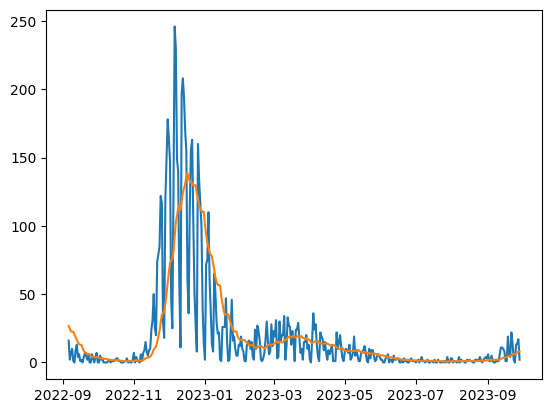

In [44]:
media_movel = df['CasosDia'].rolling(20).mean()

maeCalibra = mean_squared_error(df[split:], media_movel[split:]).round(2)

print(len(media_movel[split:]))
plt.plot(df[split:])
plt.plot(media_movel[split:])



